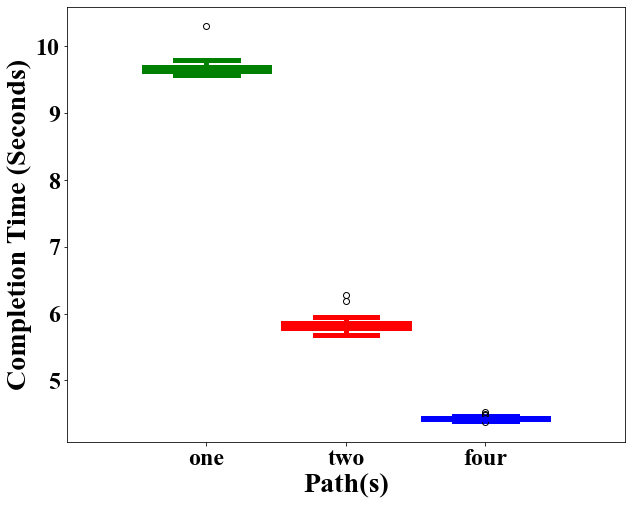

In [1]:

## figure 7a completion time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

comTime = []
topDir = './'

for j in range(1,50):
    c_time = []

    # one
    dir = 'one-'+str(j)
    file = open(topDir+dir+'/scheduler0-queue.txt', 'r')
    lines = file.readlines()
    last_line = lines[-1] 
    thp1 = float(last_line.split('\t')[0])
    c_time.append(thp1)
    
    # two
    dir = 'two-'+str(j)
    file = open(topDir+dir+'/scheduler0-queue.txt', 'r')
    lines = file.readlines()
    last_line = lines[-1]  
    thp2 = float(last_line.split('\t')[0])
    c_time.append(thp2)
    
    # four
    dir = 'four-'+str(j)
    file = open(topDir+dir+'/scheduler0-queue.txt', 'r')
    lines = file.readlines()
    last_line = lines[-1] 
    thp3 = float(last_line.split('\t')[0])
    c_time.append(thp3)
    
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['one', 'two', 'four'])



ct0 = [dataTotal['one']]
ct1 = [dataTotal['two']]
ct2 = [dataTotal['four']]
ticks = ['one', 'two', 'four']

bar_width = 0.9

boxprops = dict(linestyle='-', linewidth=5)
whiskerprops = dict(linestyle='-', linewidth=5)
capprops = dict(linestyle='-', linewidth=5)
medianprops = dict(linestyle='-', linewidth=5)

plt.figure(figsize=(10,8))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1*2,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
 


def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    plt.plot([], c=color_code, label=label)
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'green', 'one')
define_box_properties(ct_plot1, 'red', 'two')
define_box_properties(ct_plot2, 'blue', 'four')

ticks = ['one', 'two', 'four']
plt.xticks([0,1,2], ticks)
plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')
plt.ylabel("Completion Time (Seconds)", fontsize=28, fontweight='bold')
plt.xlabel("Path(s)", fontsize=28, fontweight='bold')
plt.xlim(-1, len(ticks))
plt.savefig('./scalable_comtime.pdf', format='pdf')
plt.savefig('./scalable_comtime.png', format='png')
plt.show()

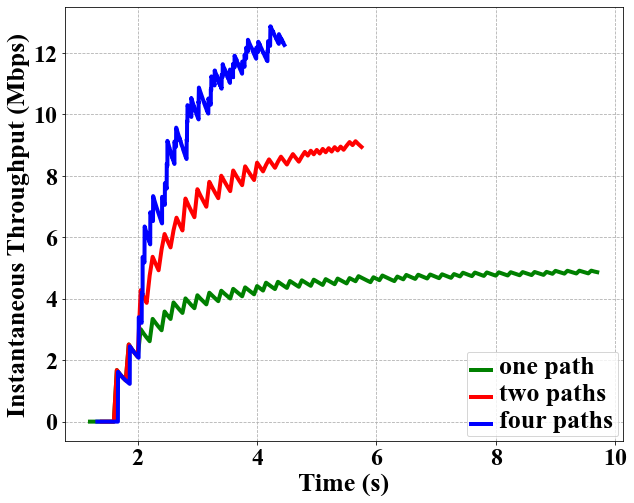

In [2]:

## figure 7b instantaneous throughput

schedulerTypes = [0]

topdir = "./"

def helpone(num,i):
    dir = topdir+'one-'+str(num)
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(dir+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal

def helptwo(num,i):
    dir = topdir+'two-'+str(num)
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(dir+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


def helpfour(num,i):
    dir = topdir+'four-'+str(num)
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(dir+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
        if (temp[0] == '4' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
        if (temp[0] == '5' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal

## take seed=39 as the example figure
j = 39
one = helpone(j,0)
two = helptwo(j,0)
four = helpfour(j,0)  

plt.figure(figsize=(10, 8))
plt.grid(linestyle="--")  
ax = plt.gca()

plt.plot(one['Time'], one['goodput'], color="green", label="one path", linewidth=4)
plt.plot(two['Time'], two['goodput'], color="red", label="two paths", linewidth=4)
plt.plot(four['Time'], four['goodput'], color="blue", label="four paths", linewidth=4)

plt.xticks(fontsize=24, fontweight='bold')  
plt.yticks(fontsize=24, fontweight='bold')

plt.ylabel("Instantaneous Throughput (Mbps)", fontsize=26, fontweight='bold')
plt.xlabel("Time (s)", fontsize=26, fontweight='bold')

plt.legend(loc=4, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=26, fontweight='bold')

plt.savefig('./ins_throughput_scalable.pdf', format='pdf')
plt.savefig('./ins_throughput_scalable.png', format='png')
plt.show()


In [3]:
plt.close()